# Procesado de datos

## Ejemplo

In [2]:
import cv2
from matplotlib import pyplot as plt
import pandas as pd

Variables

In [14]:
IMG_SIZE = 256

In [3]:
nodo1 = cv2.imread("./fotogramas/Fotogramas/nodo1/nodo100001.jpg")

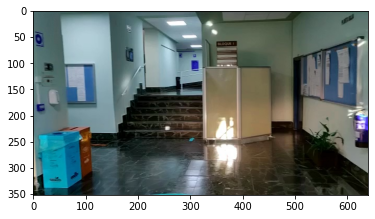

In [4]:
plt.imshow(nodo1)

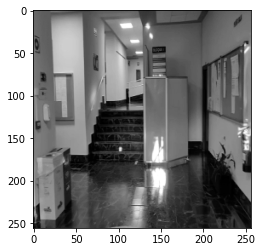

In [18]:
grayImage = cv2.cvtColor(nodo1, cv2.COLOR_BGR2GRAY)
img_pred = cv2.resize(grayImage, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
plt.imshow(img_pred, cmap='gray')

In [25]:
hist = cv2.calcHist([img_pred], [0], None, [256], [0, 256])
# hist /= hist.sum()

(0.0, 256.0)

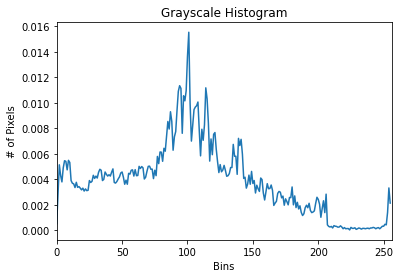

In [26]:
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

## Procesado de los fotogramas y volcado de los histogramas en CSVs

Nota: la primera fila de los csv de los histogramas de cada nodo individual son los índices de las columnas (del 0 al 255). Los datos empiezan en la segunda fila

In [12]:
import os

i = 1
df = None
first_all = True

for node in os.listdir("./fotogramas/Fotogramas"):
    first = True
    for image_file in os.listdir("./fotogramas/Fotogramas/{}".format(node)):
        image = cv2.imread("./fotogramas/Fotogramas/{}/{}".format(node,image_file))
        grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_pred = cv2.resize(grayImage, (256, 256), interpolation=cv2.INTER_AREA)
        hist = cv2.calcHist([img_pred], [0], None, [256], [0, 256])

        if first:
            df = pd.DataFrame(hist.T, index=None)
            first = False
        else:
            df = df.append(pd.DataFrame(hist.T, index=None))
        
        if first_all:
            f = open("./histogramas/ALL.csv", "w")
            f.write('valores,nodo\n')
            f.write((str(hist.T) + ',' + str(i)).replace('\n','') + "\n")
            first_all = False
        else:
            f = open("./histogramas/ALL.csv", "a")
            f.write((str(hist.T) + ',' + str(i)).replace('\n','') + "\n")


    df.to_csv("./histogramas/{}.csv".format(node), index=None)
    i += 1
